In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [13]:
wine = load_wine()

In [14]:
feature_data = wine.data
label_data = wine.target
print(wine.target_names)
print(wine.DESCR)

['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
   

In [15]:
x_train, x_test, y_train, y_test = train_test_split(feature_data, label_data, test_size = 64)
print("data len: {}\ntrain len: {}".format(len(feature_data), len(x_train)))

data len: 178
train len: 114


In [16]:
models = []
#Decision Tree 
decision_tree = DecisionTreeClassifier(random_state=32)
models.append(decision_tree)
decision_tree.fit(x_train, y_train)
#Random Forest
random_forest = RandomForestClassifier(random_state=32)
models.append(random_forest)
random_forest.fit(x_train, y_train)
#SVM
svm_model = svm.SVC()
models.append(svm_model)
svm_model.fit(x_train, y_train)
#SGD Classifier
sgd_model = SGDClassifier()
models.append(sgd_model)
sgd_model.fit(x_train, y_train)
#Logistic Regression
logistic_model = LogisticRegression(solver='lbfgs', max_iter=5000)
models.append(logistic_model)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [17]:
y_pred = []
for i in models:
    y_pred.append(i.predict(x_test))

In [ ]:
accuracy = [['Decision Tree'], ['Random Forest'], ['SVM'], ['SGDClassifier'], ['Logistic Regression']]
weighted_avg = [['Decision Tree'], ['Random Forest'], ['SVM'], ['SGDClassifier'], ['Logistic Regression']]
for i, y_pred in enumerate(y_pred):
    temp_class_report = classification_report(y_test, y_pred, output_dict=True)
    accuracy[i].append(temp_class_report['accuracy'])
    weighted_avg[i].append(temp_class_report['weighted avg']['f1-score'])

In [ ]:
#모든 값 출력
print("f1 socre \n:", weighted_avg)
model_name, acc = max(weighted_avg, key=lambda k : k[1])
print("model = {}, weigted_avg = {}".format(model_name, acc))
model_num = [i for i in range(len(weighted_avg)) if weighted_avg[i][0]==model_name]

In [10]:
model = LogisticRegression(C=1, max_iter=5000)
model.fit(x_train, y_train)

model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.921875)

(-1.5, 1.5)

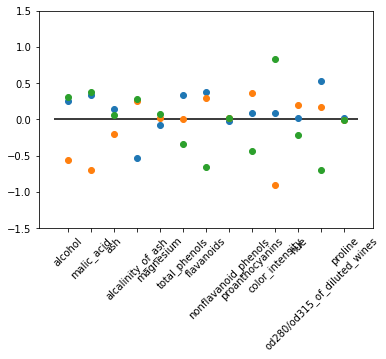

In [21]:
plt.plot(model.coef_.T, 'o')
plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=45)
xlim = plt.xlim()
plt.hlines(0, xlim[0], xlim[1])
plt.ylim(-1.5,1.5)
#카테고리별 선형모델